<a href="https://colab.research.google.com/github/christophersingh/BBC_Articles/blob/master/Deliverable_03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Headlines Based on Location

## Applying Clustering Algorithms to Find Geographically Similar Headlines

__Objective__: Cluster (find groups of) headlines based on the geographic coordinates using both KMeans clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters. The clusters will be used to find disease outbreaks in the next part.

__Workflow__:
1.	Apply KMeans clustering and the DBSCAN algorithm to the latitude and longitude of each headline. 
    -	Use the default initial parameters for the algorithm or, if you have prior experience, choose parameters you think will work well.
    -	Assign the cluster labels as another column on the DataFrame.
2.	Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster assignment.
    -	Determine if the clusters are reasonable: are headlines geographically close to one another in the same cluster?
    -	Write a visualization function to quickly check clustering results.
3.	In the likely case that the first clustering is not ideal, adjust the parameters of the algorithm you choose or use a different algorithm.
    -	You can use an elbow plot to select the number of clusters in KMeans.
    -	The two most important parameters for DBSCAN are `eps` and `min_samples`
4.	(Optional) Try using DBSCAN with the great circle distance, which finds the distance between two geographic points on a spherical globe.
    -	Write a function to return the Great Circle distance between two coordinate points.
    -	Use this function as the `metric` for DBSCAN
5.	Repeat the above steps—cluster, visualize, analyze, tune—as many times as is required until the algorithm correctly assigns close points to the same cluster without too many outliers.

__Deliverable__:

The deliverable from this section is another Jupyter Notebook documenting your work as you cluster the headlines with the coordinates and produce a world map with clustered headlines. The map should show the locations of headlines colored by the cluster assignment. We will use this DataFrame and map to find disease outbreaks in the next section.

### Read in and Examine Data

First, read in your data and make sure it looks right. You want to check there are no missing values and the data types are floats for latitude and longitude.

In [1]:
# LOAD YOUR DATA
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./processed_headlines_locations.csv')
del data['Country']
data

,Headline,City,Name,Latitude,Longitude,Country Code,Population
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,15277.0
...,...,...,...,...,...,...,...
598,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
599,More Zika patients reported in Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
600,Suva authorities confirmed the spread of Rotav...,Suva,Suva,-18.14161,178.44149,FJ,77366.0
601,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,-27.03424,-65.30196,US,27999.0


In [2]:
# CHECK FOR MISSING VALUES

data = data[data['Latitude'].notna()]
data

,Headline,City,Name,Latitude,Longitude,Country Code,Population
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,15277.0
...,...,...,...,...,...,...,...
598,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
599,More Zika patients reported in Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
600,Suva authorities confirmed the spread of Rotav...,Suva,Suva,-18.14161,178.44149,FJ,77366.0
601,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,-27.03424,-65.30196,US,27999.0


In [3]:
# CHECK THE DATA TYPES FOR LATITUDE AND LONGITUDE (SHOULD BE FLOAT)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 602
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Headline      579 non-null    object 
 1   City          579 non-null    object 
 2   Name          579 non-null    object 
 3   Latitude      579 non-null    float64
 4   Longitude     579 non-null    float64
 5   Country Code  579 non-null    object 
 6   Population    579 non-null    float64
dtypes: float64(3), object(4)
memory usage: 36.2+ KB


# Clustering using DBSCAN

Try the DBSCAN algorithm [DBSCAN algorithm](https://en.wikipedia.org/wiki/DBSCAN), specifically the implementation in the [`DBSCAN` module from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). DBSCAN: Density-Based Spatial Clustering of Applications with Noise, is a density-based algorithm for clustering a set of points that works by grouping together (clusters) points with many close neighbors. Close is defined using a distance measure such as "euclidean" and points with no neighbors are marked as outliers. (Another clustering method we can try later is K-Means clustering.)

There are many parameters in DBSCAN, but we'll initally use the default values, hoping [they are reasonable](https://arxiv.org/abs/1309.0238)!

In [4]:
from sklearn.cluster import DBSCAN

# Default sklearn parameters
clusterer = DBSCAN()
clusterer

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### Distance Metric: Euclidean

Use the ["euclidean" distance metric](https://en.wikipedia.org/wiki/Euclidean_distance) which is the straight line distance between two points. Since we are dealing with latitude and longitude on a spherical Earth, the euclidean distance is not the true distance between points but it works well.

Complete the definition of the `cluster_location` function that recieves a cluster model and runs it.

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def cluster_location(clusterer, data, lat_string="latitude", lon_string="longitude"):
    """
    Fit a clustering algorithm on location data.
    """
    # Run the DBSCAL cluster model
    data_temp = data[['Latitude','Longitude']]
    data_temp = StandardScaler().fit_transform(data_temp)
    #temp = cluster_location(clusterer, data)
    db_scan = clusterer.fit(data_temp)
    labels = db_scan.labels_

    # Assign the cluster labels in a new column 'cluster'
    data['cluster'] = labels

    return data

def holder():
  """data_temp = data[['Latitude','Longitude']]
  data_temp =  StandardScaler().fit_transform(data_temp)
  #temp = cluster_location(clusterer, data)
  db = clusterer.fit(data_temp)
  labels = db.labels_
  print(labels)
  set(labels)"""

To get a rough idea of the cluster distribution, we'll look at the number of headlines in each cluster.

In [6]:
data = cluster_location(clusterer, data)
data['cluster'].value_counts()

 0    552
 1     24
-1      3
Name: cluster, dtype: int64

__-1 in this library indicates the point is _an outlier (noise)_ and has not been assigned to any cluster.__ The [documentation says](https://scikit-learn.org/stable/modules/clustering.html#dbscan) we can try adjusting the parameters to reduce the number of unassigned points, or it may be we have noisy data and many of the headlines do not belong to a cluster. 

## Adjusting Parameters

It's time to dig into the DBSCAN algorithm parameters. Look at the documentation [parameter documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).

Based on the documentation, the most important parameters are:

1. `eps`: "The maximum distance between two samples for one to be considered as in the neighborhood of the other."
2. `min_samples`: "The number of samples (or total weight) in a neighborhood for a point to be considered as a core point."

Start with the most important parameter, `eps`, or the distance between points.

### eps

The `eps` parameter is the "maximum distance between two samples for one to be considered in the neighborhood of the other." According to the documentation, this is the most important parameter. To try and put more headlines in each cluster, we can increase eps. 

Since we are using euclidean distance with latitude and longitude, we can't interpret `eps` as representing miles or another distance unit. This will be addressed when we try a different distance metric.

**Delete the current cluster column that was created in the previous step**

---



In [7]:
del data['cluster']

In [8]:
# TEST DIFERENT VALUES FOR THE 'eps' PARAMETER

clusterer2 = DBSCAN(eps=0.92)
data = cluster_location(clusterer2, data)
data['cluster'].value_counts()

0    579
Name: cluster, dtype: int64

***When eps is set to be greater than or equal to 0.92, we get only 1 cluster with no outliers***


Increasing `eps` significantly decreased the number of points not in a cluster and resulted in several prominent clusters of headlines. This is as expected, because we allow points to be farther away from each other but still in the same cluster.

### Minimum Number of Samples

The `min_sample_size` controls the minimum number of samples in a neighborhood for a point to be "considered a core point". We can think of this as the minimum number of cities that must be in a cluster.Adjust this value to improve your clustering solution. 

In [9]:
# TEST DIFERENT VALUES FOR THE 'min_sample_size' PARAMETER

clusterer3 = DBSCAN(min_samples=13)
data = cluster_location(clusterer3, data)
data['cluster'].value_counts()


 0    376
 1    153
 2     24
 3     20
-1      6
Name: cluster, dtype: int64

We have reduced the number of headlines not in a cluster, but created several more clusters. Let's use these parameters as the "best" for now and visualize the results on a map.

In [10]:
clusterer3 = DBSCAN(eps=0.30, min_samples=1)
data = cluster_location(clusterer3, data)
data['cluster'].value_counts()

0     352
2      87
3      66
1      23
6      19
4      18
11      3
7       3
10      2
5       2
13      1
12      1
9       1
8       1
Name: cluster, dtype: int64

# Visualizing Clusters

Even without a perfect clustering, you can try to visualize these clusters. Use the Python library `basemap` which works with matplotlib.

To install basemap, follow the directions on the [GitHub repository](https://github.com/matplotlib/basemap) or use the `environment.yml` file in the base GitHub repository and install with conda.  
  
  **NOTE: Basemap is transitioning over to Cartopy, and should not be used for new projects.**

The [Basemap documentation](https://basemaptutorial.readthedocs.io/en/latest/index.html#basemap-tutorial) gives all the help we need for creating a map of the world.

***Install Basemap Below:***

**Remove the comments and execute the following commands**
```
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
```

**Be sure to restart runtime afterwards**

In [11]:
"""!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip"""

'!apt-get install libgeos-3.5.0\n!apt-get install libgeos-dev\n!pip install https://github.com/matplotlib/basemap/archive/master.zip'

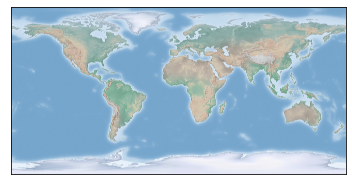

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

%matplotlib inline

# Simple world map
m = Basemap()
_ = m.shadedrelief()

Drawing a simple map with `basemap` is very easy. Now, you have to map the latitude and longitude onto the map. This requires converting the latitude and longitude coordinates to the map coordinates.

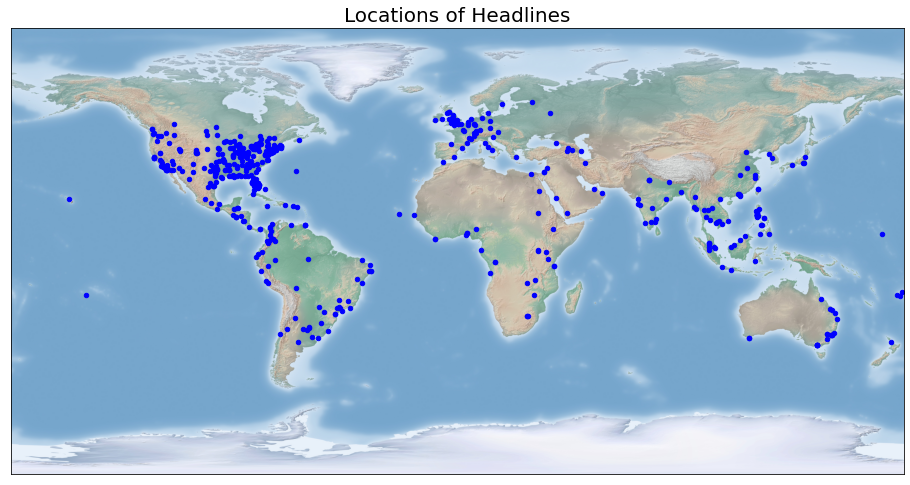

In [13]:
import matplotlib.pyplot as plt

# Make an empty figure
plt.figure(figsize=(16, 10))

# Convert the longitude, latitude to map projection coordinates
x, y = m(x=data["Longitude"], y=data["Latitude"])

m.shadedrelief()

# Plot the headline locations
plt.scatter(x, y, 20, marker="o", color="blue")

# Grab the current axis to set the title (gca)
ax = plt.gca()
_ = ax.set_title("Locations of Headlines", size=20)

Fortunately our coordinates look to be correct! Geographic plotting can be tricking, notably getting the coordinate system and transformations correct.

## Plotting Clusters

Now, you need to associate colors with each cluster. The easiest way to do this is to iterate through each cluster and plot one cluster at a time with a different color. Add a legend for interpretation.

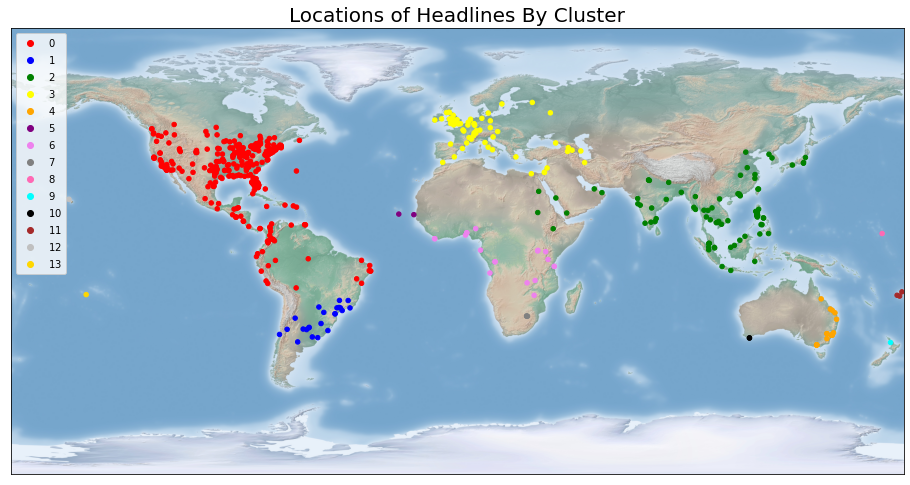

In [27]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16, 10))

m.shadedrelief()
data["x"], data["y"] = x, y
classes = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5', 'Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10','Cluster 11','Cluster 12','Cluster 13']

colors = ListedColormap(['red','blue','green','yellow','orange','purple','violet','gray','hotpink','cyan','black','brown','silver','gold'])
scatter = plt.scatter(x, y, 20, marker="o", c=data['cluster'], cmap=colors)

ax = plt.gca()
ax.legend(*scatter.legend_elements())
_ = ax.set_title("Locations of Headlines By Cluster", size=20)

Now you have a map with each point colored by cluster membership. Put our plotting code into a function so you can plot a map with cluster membership at any time.

In [28]:
def plot_clusters(data):
    plt.figure(figsize=(16, 10))

    m.shadedrelief()
    data["x"], data["y"] = x, y
    classes = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5', 'Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10','Cluster 11','Cluster 12','Cluster 13']

    colors = ListedColormap(['red','blue','green','yellow','orange','purple','violet','gray','hotpink','cyan','black','brown','silver','gold'])
    scatter = plt.scatter(x, y, 20, marker="o", c=data['cluster'], cmap=colors)

    ax = plt.gca()
    ax.legend(*scatter.legend_elements())
    _ = ax.set_title("Locations of Headlines By Cluster", size=20)

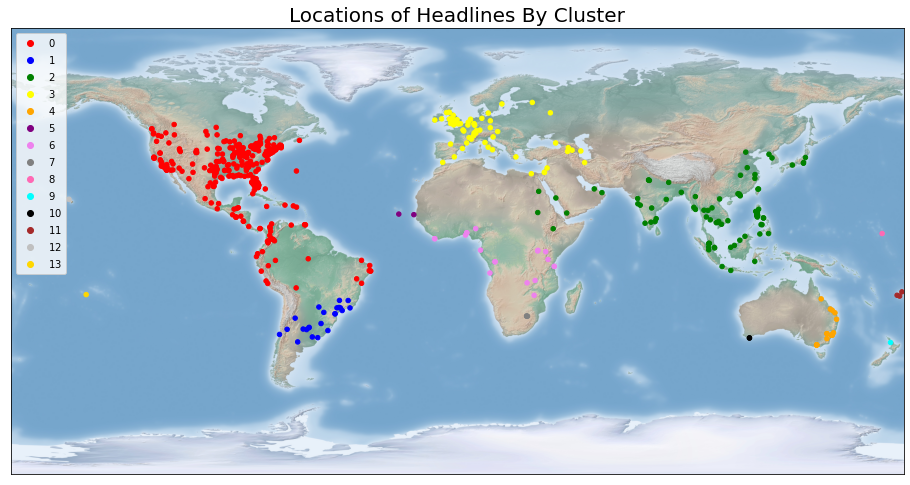

In [29]:
# YOU CAN SAVE YOUR PLOT AS A PICTURE
plot_clusters(data)
plt.savefig('./euclidean_clustering_map.png')

## Results Interpretation: Are Clusters Reasonable?

Describe your results

** DESCRIBE YOUR RESULTS HERE **

# KMeans

The second method to try for clustering is the [KMeans algorithm](https://en.wikipedia.org/wiki/K-means_clustering). KMeans places data points into k clusters - chosen ahead of time by the programmer - where each data point belongs to the cluster with the nearest mean. We'll use Scikit-Learn ([sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) for the implementation.  

In [ ]:
from sklearn.cluster import KMeans

kmeans_clusterer = KMeans()
kmeans_clusterer

Try a range of values for the number of clusters, `n_clusters`. For each value, analyze the `inertia`, the within-cluster sum-of-squares criterion. This is the loss KMeans attempts to minimize. 

In [ ]:
# INERTIA ANALYSIS HERE

You can now make an elbow plot of the inertia values to find the ideal number of clusters.

In [ ]:
# CREATE A PLOT OF THE INERTIA VALUES TO DECIDE WITH K TO USE (ELBOW PLOT)

Where is the elbow of the plot?

In [ ]:
# RUN THE CLUSTER WITH THE CHOSEN K AND PLOT THE MAP USING THE `plot_clusters` FUNCTION

## Limitations of KMeans

Using 8 clusters produces reasonable groups of headlines. However, KMeans is limited because it must assign every point to a cluster when clearly there are outlying headlines that should not belong to any group. You might not want to end up with false negatives because these outliers are assigned to a cluster. Consider this shortcoming to decide whether or not use the kMeans.

# World Plot

For the final output of this section, you will create a plot using the best-identified clusterer without the outliers.

In [ ]:
# YOUR KMEAN WORLD PLOT HERE

## Cluster Distribution

What is the cluster distribution of the headlines?

Are you noticing any skewness in the data?

In [ ]:
# PLOT DISTRIBUTION OF HEADLINES PER CLUSTER

If skewness is present find a solution.

# Save Your Data

In [ ]:
data.to_csv('./data/processed_headlines_clustered.csv')

# Output

The output from this section is:

1. The dataframe with the cluster assignments.
2. The world map with the headlines plotted and colored by cluster assignment.

In [ ]:
data[['headline', 'city', 'latitude', 'longitude', 'countrycode', 'cluster']].head(10)

In [ ]:
from IPython.display import Image

Image('./data/entire_world_clustering.png')

In [ ]:
data[['headline', 'city', 'latitude', 'longitude', 'countrycode', 'cluster']].to_csv('./data/clustered_data.csv')

From the cluster assignments and using the world map, you will be able to identify outbreaks in the next section.

# Summary

In this notebook you:

* Applied DBSCAN and kMEANs as clustering algorithms on the headlines dataset
* Discuss the pro and cons of both and picked the algorithm offering the best outcome.
* Produced a final clustering and world image of the clusters

The end deliverable is a set of cluster labels assigned to headlines. We also have an image of the world with the clusters visualized.